In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class LinearRegressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])
        return data_mat

    def fit(self, X, y):
        data_mat = self.data_matrix(X)
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = np.dot(data_mat[i], self.weights)
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
        print('LinearRegression Model(learning_rate={}, max_iter={})'.format(self.learning_rate, self.max_iter))

    def predict(self, X):
        X = self.data_matrix(X)
        predictions = np.dot(X, self.weights)
        return predictions

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        mse = np.mean((predictions - y_test) ** 2)
        return mse

In [15]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [16]:
model = LinearRegressionClassifier(learning_rate=0.01, max_iter=1000)
model.fit(X, y)

LinearRegression Model(learning_rate=0.01, max_iter=1000)


In [18]:
X_new = np.array([[0], [2]])
y_predict = model.predict(X_new)

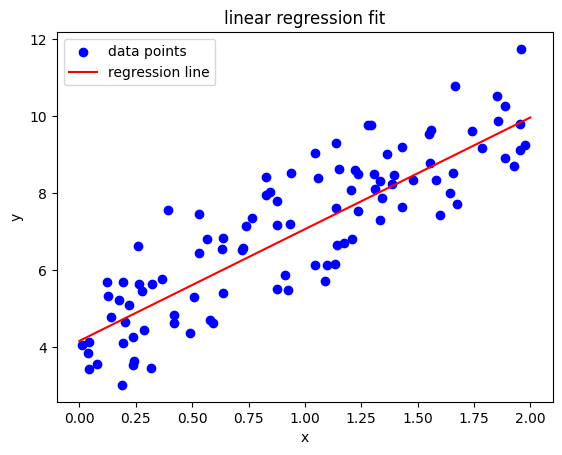

In [21]:
plt.scatter(X, y, color="blue", label="data points")
plt.plot(X_new, y_predict, color="red", label="regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("linear regression fit")
plt.legend()
plt.show()

In [22]:
intercept = model.weights[0][0]
slope = model.weights[1][0]
print(f"equation: y = {intercept:.2f} + {slope:.2f} * x")

equation: y = 4.16 + 2.90 * x
